In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
#create dataframe
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [4]:
#draw a sample size of 5
a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement) #samples can be retrieved more than once

3    20
3    20
9    60
0    47
5    13
Name: Population, dtype: int64


In [5]:
#draw another sample size 5
a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement) #samples cannot appear twice

6    72
7    16
0    47
9    60
8    50
Name: Population, dtype: int64


In [8]:
# Calculate mean and variance for sample without replacement
population_mean = a_sample_without_replacement.mean()
population_var = a_sample_without_replacement.var()
print('Population mean is ', population_mean)
print('Population variance is', population_var)

Population mean is  49.0
Population variance is 436.0


In [9]:
#get new sample, mean and variance
a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  46.5
Sample variance is 518.2777777777778


In [12]:
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]
print("Sample variance for data",sample_variance_collection)

Sample variance for data [615.8222222222223, 747.3444444444444, 803.7888888888889, 658.2666666666667, 634.3222222222223, 485.77777777777777, 459.5111111111112, 422.72222222222223, 523.3444444444444, 590.1, 1056.9333333333334, 792.2777777777778, 771.2111111111112, 394.39999999999986, 199.38888888888889, 768.9888888888888, 556.7111111111112, 821.1222222222221, 289.5111111111111, 518.8444444444444, 591.7888888888888, 499.73333333333335, 573.5666666666667, 466.9333333333333, 639.6555555555556, 490.1777777777778, 291.87777777777785, 387.12222222222215, 619.3888888888889, 422.5444444444444, 850.7111111111111, 440.8444444444445, 787.7333333333332, 526.1777777777778, 440.44444444444446, 658.0111111111112, 611.0666666666666, 572.0555555555555, 515.8222222222222, 532.1777777777777, 665.5666666666666, 573.6555555555556, 434.6666666666667, 484.3222222222222, 373.82222222222214, 505.4333333333334, 996.1777777777776, 570.9888888888888, 350.5444444444445, 593.5666666666667, 520.0444444444444, 388.766

In [14]:
# Sample mean and SD
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  10.023302880376
sample SD is  4.454394445030584


/Users/student/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


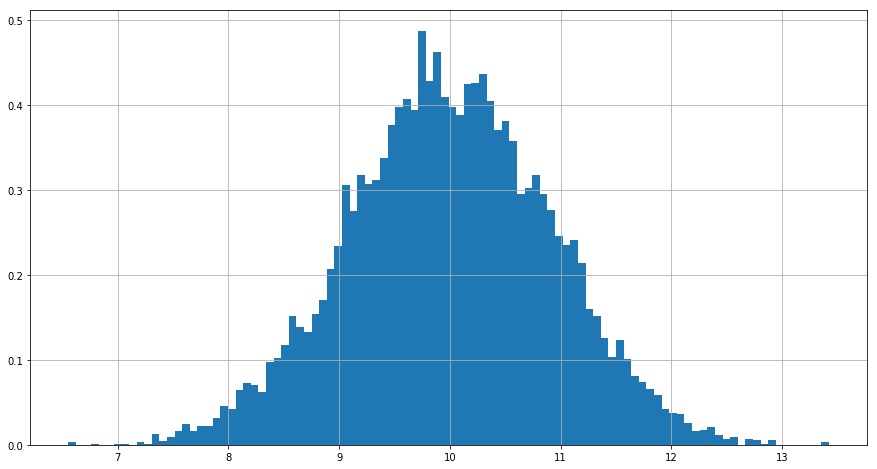

In [34]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2e5586a0>]],
      dtype=object)

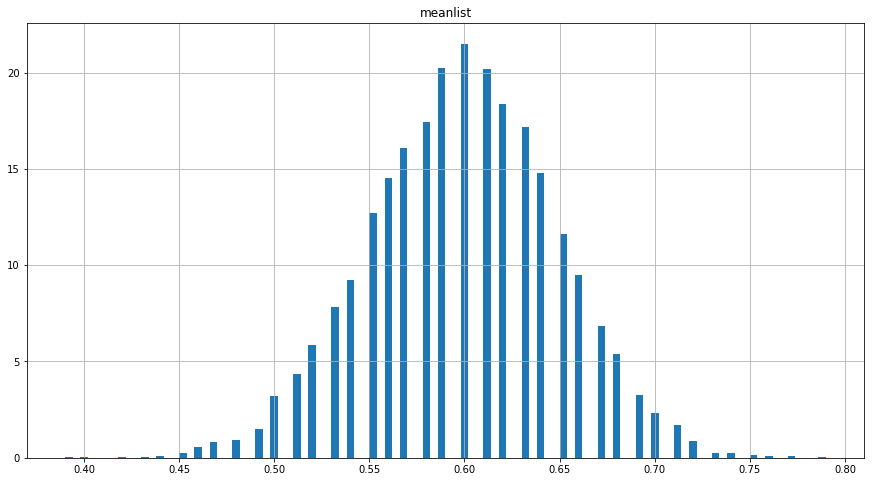

In [18]:
#using a sample size of 100
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2f0e6da0>]],
      dtype=object)

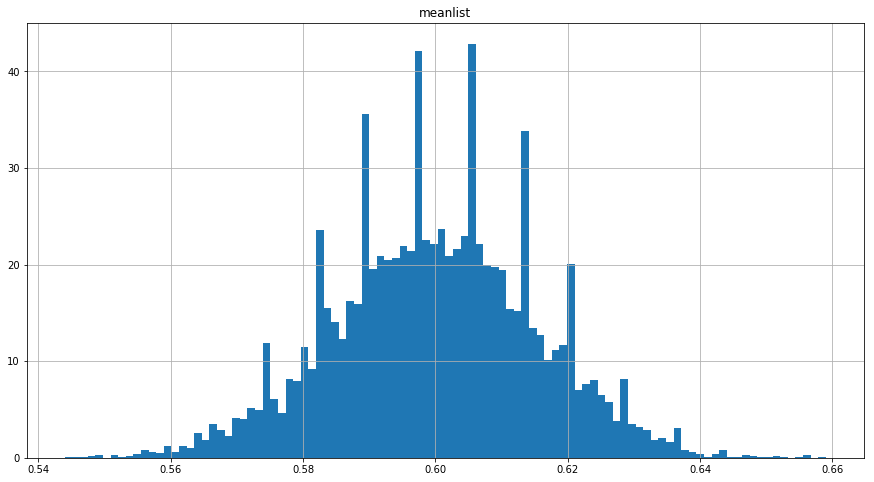

In [21]:
#changing sample size to something larger to observe changes in the graph
sample_size = 1000
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True) 
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

In [25]:
ms= pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [29]:
#get average stock return from microsoft
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [35]:
# Lets build 90% confidence interval for log return
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [36]:

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.00016900921195778804, 0.0014714537602882566)


In [39]:
#add log return to microsoft csv
ms = pd.read_csv('microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1))-np.log(ms['Close'])

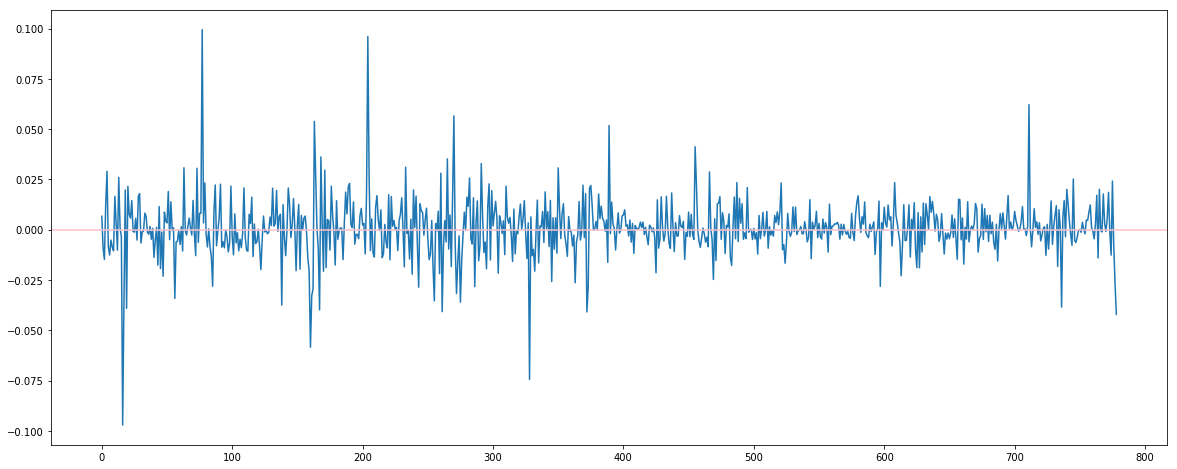

In [40]:
#observe log return in plot
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='pink')
plt.show()

In [41]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# z distribution is preferred for large samples
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


In [42]:
# confidence level and decision criteria for hypothesis
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


In [43]:
print('At significant level of {}, reject?: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, reject?: False


In [47]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


In [48]:
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [49]:
print('At significant level of {}, reject?: {}'.format(alpha, zhat>zright))

At significant level of 0.05, reject?: False


In [50]:
#using p
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [51]:
print('At significant level of {}, reject?: {}'.format(alpha, p<alpha))

At significant level of 0.05, reject?: False
